<b> Проект: "Выделение групп пользователей на основе поведения в мобильном приложении.</b>

<b> Оглавление проекта:</b>

[1. Загрузка и изучение данных.](#step_1)

[2. Предобработка данных.](#step_2)

[3. Исследовательский анализ данных (EDA).](#step_3)

[3.1. Расчет количества событий и пользователей в логе.](#step_3.1)

[3.2. Расчет среднего количества событий, приходящегося на одного пользователя.](#step_3.2)

[3.3. Выделение пользовательских сессий.](#step_3.3)

[3.4. Расчет количества сессий на одного пользователи и количества совершенных событий пользователем за одну сессию.](#step_3.4)

[3.5. Расчет длительности пользовательской сесиии.](#step_3.5)

[3.6. Создание пользовательских профилей.](#step_3.6)

[4. Сегментация пользователей на основе действий.](#step_4)

[4.1. Кластеризация пользователей на основании алгоритма K-Means по данным из пользовательских профилей.](#step_4.1)

[4.2. Построение графиков распределения признаков для кластеров и характеристика для каждого кластера.](#step_4.2)

[5. Расчет и сравнение метрик пользователей из различных кластеров.](#step_5)

[5.1. Расчет и сравнение retention rate.](#step_5.1)

[5.2. Расчет и сравнение времени, проведенного пользователем в приложении.](#step_5.2)

[5.3. Расчет и сравнение среднего количества действий, совершенных пользователем.](#step_5.3)

[5.4. Расчет и сравнение конверсии в целевое действие — просмотр контактов.](#step_5.4)

[6. Проверка статистических гипотез.](#step_6)

[6.1. Гипотеза №1 : Конверсии в просмотры контактов для пользователей, установивших приложение по ссылке из yandex, и пользователей, установивших приложение по ссылке из google, различаются.](#step_6.1)

[6.2. Гипотеза №2 : Конверсии в просмотры контактов для пользователей, просмотревших рекомендованные объявления, и пользователей, не просмотревших рекомендованные объявления, различаются.](#step_6.2)

[7. Общие выводы и рекомендации.](#step_7)

[8. Презентация.](#step_8)

<a id="step_1"></a> 
## Загрузка и изучение данных

In [1]:
# импорт библиотек 
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
from datetime import datetime, timedelta
# библиотеки необходимые для кластеризации
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_event = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
df_event

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [4]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
df_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
df_sourсes

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


In [6]:
df_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


В таблице `df_event` 74197 записей, пропусков в данных нет. В столбце "event.time", хранящего время совершения события, следует заменить тип данных.

В таблице `df_sourсes` 4293  записей, пропуски в данных также отсутствуют.

Для удобства в обеих таблицах следует заменить названия столбцов.

<a id="step_2"></a> 
## Предобработка данных

Изменим названия столбцов.

In [7]:
df_event.columns = df_event.columns.str.replace('.','_')
df_event.columns

Index(['event_time', 'event_name', 'user_id'], dtype='object')

In [8]:
df_sourсes = df_sourсes.rename(columns={'userId':'user_id'})
df_sourсes.columns

Index(['user_id', 'source'], dtype='object')

Проверим датасеты на наличие дубликатов.

In [9]:
df_event.duplicated().sum()

0

In [10]:
df_event.duplicated().sum()

0

В данных отсутствуют дубликаты.

Изменим тип данных столбца `event_time` 

In [11]:
df_event['event_time'] = pd.to_datetime(df_event['event_time']).dt.floor('s')
print(df_event.info())
df_event.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB
None


,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Выделим отдельно столбец с датами событий

In [12]:
df_event['event_date'] = df_event['event_time'].dt.date

In [13]:
df_event['event_date'] = pd.to_datetime(df_event['event_date'])
df_event.head()

,event_time,event_name,user_id,event_date
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07


Объединим события `contacts_show` и `show_contacts` в столбце "event_name" таблицы df_event

In [14]:
df_event['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

In [15]:
df_event['event_name'] = df_event['event_name'].replace('show_contacts','contacts_show')

In [16]:
df_event['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7'], dtype=object)

Для удобства объединим датафреймы `df_event` и `df_sourсes`

In [17]:
df_mobile = pd.merge(df_event,df_sourсes,how='left',on='user_id')
df_mobile

,event_time,event_name,user_id,event_date,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,yandex
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,yandex
...,...,...,...,...,...
74192,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,google
74193,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,google
74194,2019-11-03 23:56:57,search_1,20850c8f-4135-4059-b13b-198d3ac59902,2019-11-03,google
74195,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,google


<a id="step_3"></a> 
## Исследовательский анализ данных (EDA)

Изучим временной период располагаемых данных.

In [18]:
min_date = df_mobile['event_date'].min().date()
max_date = df_mobile['event_date'].max().date()
print("Минимальная дата:",min_date)
print("Максимальная дата:",max_date)

Минимальная дата: 2019-10-07
Максимальная дата: 2019-11-03


<a id="step_3.1"></a> 
### Расчет количества событий и пользователей в логе

In [19]:
events_number = df_mobile['event_name'].count()
print('Общее количество событий в логе:', events_number)

Общее количество событий в логе: 74197


In [20]:
users_number = df_mobile['user_id'].nunique()
print('Количество уникальных пользователей в логе:', users_number)

Количество уникальных пользователей в логе: 4293


<a id="step_3_2"></a> 
### Расчет среднего количества событий, приходящегося на одного пользователя.

In [21]:
events_mean = (
    df_mobile.groupby('user_id')
    .agg({'event_name':'count'})
    .reset_index()
    .rename(columns={'event_name':'event_amount'})
)
events_mean_value = int(events_mean['event_amount'].mean())
events_median_value = int(events_mean['event_amount'].median())
print('Среднее количество событий, приходящееся на одного пользователя:',events_mean_value)
print('Медианное количество событий, приходящееся на одного пользователя:',events_median_value)

Среднее количество событий, приходящееся на одного пользователя: 17
Медианное количество событий, приходящееся на одного пользователя: 9


Построим гистограмму распределения количества событий на одного пользователя

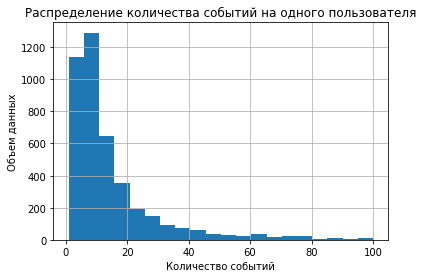

count    4293.000000
mean       17.283252
std        29.130677
min         1.000000
25%         5.000000
50%         9.000000
75%        17.000000
max       478.000000
Name: event_amount, dtype: float64

In [22]:
events_mean['event_amount'].hist(bins=20,range=(1,100))
plt.title('Распределение количества событий на одного пользователя')
plt.xlabel('Количество событий')
plt.ylabel('Объем данных')
plt.show()
events_mean['event_amount'].describe()

Медианное количество событий, приходящееся на одного пользователя равно 9.

Значение 75 квантиля равно 17, как и значение среднего количесва событий, приходящегося на пользователя, следовательно, только 25% выборки превышает данное значение количества событий.

Согласно распределению наиболее часто встречающееся количество событий на пользователя, находится в диапозоне от 5 до 10.

Рассмотрим какие события есть в логе и как часто они встречаются

In [23]:
df_event = df_mobile.groupby('event_name').agg({'user_id':['nunique','count']}).reset_index()
df_event.columns = ['event_name','event_unique','event_amount']
df_event = df_event.sort_values(by='event_unique',ascending=False)
df_event

,event_name,event_unique,event_amount
14,tips_show,2801,40055
4,map,1456,3881
5,photos_show,1095,10012
2,contacts_show,981,4529
6,search_1,787,3506
0,advert_open,751,6164
10,search_5,663,1049
9,search_4,474,701
3,favorites_add,351,1417
11,search_6,330,460


Самое распростроненное и по колиечству охваченных пользователей и по частоте встречаемости событие - просмотр рекомендаций.

<a id="step_3.3"></a> 
### Выделение пользовательских сессий

Критерием новой пользовательской сессии будем считать - если между ней и предыдущим совершенным событием пользователя временной промежуток более 30 минут, если промежуток менее 30 минут - данные события в рамках одной пользовательской сессии.

Отсортируем датафрем по `user_id` и `event_time`, чтобы события каждого пользователя шли последовательно в хронологическом порядке.

In [24]:
df_mobile = df_mobile.sort_values(['user_id','event_time']).set_index('user_id').reset_index()
df_mobile.head()

,user_id,event_time,event_name,event_date,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show,2019-10-07,other
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31,tips_show,2019-10-07,other
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05,tips_show,2019-10-07,other
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20,tips_show,2019-10-07,other
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30,tips_show,2019-10-07,other


В столбце `diff` для каждого события отдельного пользователя расчитаем разницу между временем совершения события и временем совершения предыдущего события.

Значение "NaT" в столбце `diff` означает, что событие было первым для пользователя.

In [25]:
df_mobile['diff'] = df_mobile.groupby('user_id')['event_time'].diff(1)
df_mobile.head()

,user_id,event_time,event_name,event_date,source,diff
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show,2019-10-07,other,NaT
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31,tips_show,2019-10-07,other,0 days 00:00:46
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05,tips_show,2019-10-07,other,0 days 00:00:34
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20,tips_show,2019-10-07,other,0 days 00:02:15
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30,tips_show,2019-10-07,other,0 days 00:02:10


Добавим столбец `id` ,содержащий порядковый номер события в логе.

In [26]:
df_mobile = df_mobile.reset_index()
df_mobile.head()

,index,user_id,event_time,event_name,event_date,source,diff
0,0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show,2019-10-07,other,NaT
1,1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31,tips_show,2019-10-07,other,0 days 00:00:46
2,2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05,tips_show,2019-10-07,other,0 days 00:00:34
3,3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20,tips_show,2019-10-07,other,0 days 00:02:15
4,4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30,tips_show,2019-10-07,other,0 days 00:02:10


In [27]:
df_mobile = df_mobile.rename(columns={'index': 'id'})
df_mobile.head()

,id,user_id,event_time,event_name,event_date,source,diff
0,0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show,2019-10-07,other,NaT
1,1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31,tips_show,2019-10-07,other,0 days 00:00:46
2,2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05,tips_show,2019-10-07,other,0 days 00:00:34
3,3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20,tips_show,2019-10-07,other,0 days 00:02:15
4,4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30,tips_show,2019-10-07,other,0 days 00:02:10


Создадим датафрейм, содержащий события, являющиеся первыми событиями пользовательской сессии (первое событие пользователя или событие с временным промежутком от предыдущего более 30 минут). 

30 минут - стандартное время между сессиями, которое используется во многих системах аналитики (Google Analytics, Яндекс.Метрика).

In [28]:
sessions_start_df = df_mobile[(df_mobile['diff'].isnull()) | (df_mobile['diff'] > '1800 seconds')]
sessions_start_df['session_id'] = sessions_start_df['id']
sessions_start_df.head()

,id,user_id,event_time,event_name,event_date,source,diff,session_id
0,0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show,2019-10-07,other,NaT,0
9,9,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09 18:33:55,map,2019-10-09,other,2 days 04:44:14,9
13,13,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21 19:52:30,tips_show,2019-10-21,other,12 days 01:10:08,13
27,27,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22 11:18:14,map,2019-10-22,other,0 days 15:10:44,27
35,35,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33,search_1,2019-10-19,yandex,NaT,35


Объединим исходный датафрейм с датафреймом первых сессий.

In [29]:
df_mobile = df_mobile.sort_values('id')
sessions_start_df = sessions_start_df.sort_values('id')
df_mobile = pd.merge_asof(
    df_mobile,sessions_start_df[['id','user_id','session_id']],on='id',by='user_id')
df_mobile.head()

,id,user_id,event_time,event_name,event_date,source,diff,session_id
0,0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show,2019-10-07,other,NaT,0
1,1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31,tips_show,2019-10-07,other,0 days 00:00:46,0
2,2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05,tips_show,2019-10-07,other,0 days 00:00:34,0
3,3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20,tips_show,2019-10-07,other,0 days 00:02:15,0
4,4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30,tips_show,2019-10-07,other,0 days 00:02:10,0


В столбце `session_id` содержится уникальный идентификатор сессии.

In [30]:
df_mobile = df_mobile.sort_values(['user_id','event_time'])
df_mobile = df_mobile.drop(['id'], axis=1)
df_mobile

,user_id,event_time,event_name,event_date,source,diff,session_id
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show,2019-10-07,other,NaT,0
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31,tips_show,2019-10-07,other,0 days 00:00:46,0
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05,tips_show,2019-10-07,other,0 days 00:00:34,0
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20,tips_show,2019-10-07,other,0 days 00:02:15,0
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30,tips_show,2019-10-07,other,0 days 00:02:10,0
...,...,...,...,...,...,...,...
74192,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03 15:51:23,tips_show,2019-11-03,google,0 days 00:00:27,74183
74193,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03 15:51:57,contacts_show,2019-11-03,google,0 days 00:00:34,74183
74194,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03 16:07:40,tips_show,2019-11-03,google,0 days 00:15:43,74183
74195,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03 16:08:18,tips_show,2019-11-03,google,0 days 00:00:38,74183


Расчитаем полученное количество сессий.

In [31]:
df_mobile['session_id'].nunique()

10368

<a id="step_3.4"></a> 
### Расчет количества сессий на одного пользователи и количества совершенных событий пользователем за одну сессию.

In [32]:
events_number = df_mobile.groupby(['user_id','session_id'])['event_name'].count().reset_index()
events_number = events_number.rename(columns={'event_name':'event_count'})
events_number

,user_id,session_id,event_count
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,9
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,9,4
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,13,14
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,27,8
4,00157779-810c-4498-9e05-a1e9e3cedf93,35,9
...,...,...,...
10363,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,74161,1
10364,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,74162,2
10365,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,74164,4
10366,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,74168,15


Построим распределение количества сессий на одного пользователя.

In [33]:
ses_count = events_number.groupby('user_id').agg({'session_id':'count'}).reset_index()
ses_count = ses_count.rename(columns={'session_id':'session_count'})
ses_count.head()

,user_id,session_count
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4
1,00157779-810c-4498-9e05-a1e9e3cedf93,6
2,00463033-5717-4bf1-91b4-09183923b9df,1
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,6
4,00551e79-152e-4441-9cf7-565d7eb04090,3


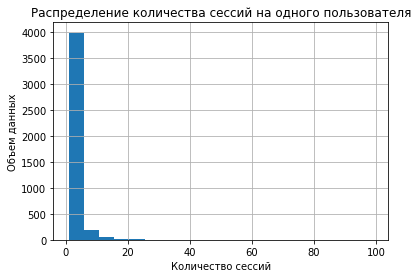

count    4293.000000
mean        2.415094
std         3.536466
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        99.000000
Name: session_count, dtype: float64

In [34]:
ses_count.hist(bins=20)
plt.xlabel('Количество сессий')
plt.ylabel('Объем данных')
plt.title('Распределение количества сессий на одного пользователя')
plt.show()
ses_count['session_count'].describe()

Абсолютное большинство пользователей совершает всего одну пользовательскую сессию в приложении.

Построим распределение количества событий за одну сессию

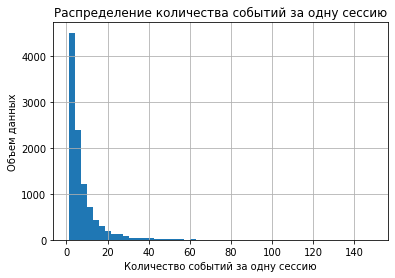

count    10368.000000
mean         7.156346
std          9.581106
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max        149.000000
Name: event_count, dtype: float64

In [35]:
events_number['event_count'].hist(bins=50)
plt.xlabel('Количество событий за одну сессию')
plt.ylabel('Количество сессий')
plt.title('Распределение количества событий за одну сессию')
plt.show()
events_number['event_count'].describe()

Рассмотрим распределение подробнее.

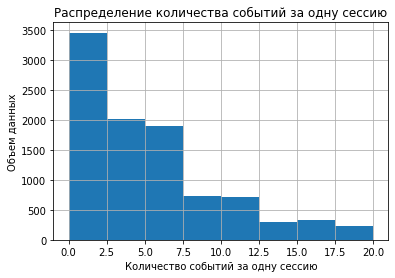

In [36]:
events_number['event_count'].hist(bins=8,range=(0,20))
plt.xlabel('Количество событий за одну сессию')
plt.ylabel('Количество сессий')
plt.title('Распределение количества событий за одну сессию')
plt.show()

In [37]:
print('Среднее количество сессий на одного пользователя:',ses_count['session_count'].mean().round())
print('Среднее количество событий за одну пользовательскую сессию:',events_number['event_count'].mean().round())

Среднее количество сессий на одного пользователя: 2.0
Среднее количество событий за одну пользовательскую сессию: 7.0


<a id="step_3.5"></a> 
### Расчет длительности пользовательской сесиии.

Для начала расчитаем время совершения каждого события внутри сессий.

In [38]:
df_mobile['event_duration'] = df_mobile.groupby(['session_id'])['event_time'].diff(1)
df_mobile.head(10)

,user_id,event_time,event_name,event_date,source,diff,session_id,event_duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show,2019-10-07,other,NaT,0,NaT
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31,tips_show,2019-10-07,other,0 days 00:00:46,0,0 days 00:00:46
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05,tips_show,2019-10-07,other,0 days 00:00:34,0,0 days 00:00:34
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20,tips_show,2019-10-07,other,0 days 00:02:15,0,0 days 00:02:15
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30,tips_show,2019-10-07,other,0 days 00:02:10,0,0 days 00:02:10
5,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:43,tips_show,2019-10-07,other,0 days 00:00:13,0,0 days 00:00:13
6,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:46:31,tips_show,2019-10-07,other,0 days 00:00:48,0,0 days 00:00:48
7,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:47:32,tips_show,2019-10-07,other,0 days 00:01:01,0,0 days 00:01:01
8,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:49:41,tips_show,2019-10-07,other,0 days 00:02:09,0,0 days 00:02:09
9,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09 18:33:55,map,2019-10-09,other,2 days 04:44:14,9,NaT


In [39]:
df_mobile['event_duration'] = df_mobile.groupby(['session_id'])['event_duration'].shift(-1)
df_mobile.head()

,user_id,event_time,event_name,event_date,source,diff,session_id,event_duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show,2019-10-07,other,NaT,0,0 days 00:00:46
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31,tips_show,2019-10-07,other,0 days 00:00:46,0,0 days 00:00:34
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05,tips_show,2019-10-07,other,0 days 00:00:34,0,0 days 00:02:15
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20,tips_show,2019-10-07,other,0 days 00:02:15,0,0 days 00:02:10
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30,tips_show,2019-10-07,other,0 days 00:02:10,0,0 days 00:00:13


In [40]:
session_time = df_mobile.groupby('session_id').agg({'event_duration':'sum'})
session_time = session_time.reset_index().rename(columns={'event_duration':'session_duration'})
session_time

,session_id,session_duration
0,0,0 days 00:09:56
1,9,0 days 00:08:27
2,13,0 days 00:15:00
3,27,0 days 00:12:38
4,35,0 days 00:25:21
...,...,...
10363,74161,0 days 00:00:00
10364,74162,0 days 00:16:14
10365,74164,0 days 00:04:57
10366,74168,0 days 00:15:49


Совместим продолжительности сессий с id пользователей, совершивших данные сессии.

In [41]:
session_time = pd.merge(session_time,df_mobile[['user_id','session_id']],how='left',on='session_id')

In [42]:
session_time = session_time.drop_duplicates().reset_index(drop=True)
session_time

,session_id,session_duration,user_id
0,0,0 days 00:09:56,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
1,9,0 days 00:08:27,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
2,13,0 days 00:15:00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
3,27,0 days 00:12:38,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
4,35,0 days 00:25:21,00157779-810c-4498-9e05-a1e9e3cedf93
...,...,...,...
10363,74161,0 days 00:00:00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
10364,74162,0 days 00:16:14,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
10365,74164,0 days 00:04:57,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
10366,74168,0 days 00:15:49,fffb9e79-b927-4dbb-9b48-7fd09b23a62b


Проверим наличие нулевых сессий.

In [43]:
session_time.query('session_duration == "0 days 00:00:00"')['session_duration'].count()

2145

Удалим нулевые сессии.

In [44]:
session_time = session_time.query('session_duration != "0 days 00:00:00"').reset_index(drop=True)
session_time

,session_id,session_duration,user_id
0,0,0 days 00:09:56,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
1,9,0 days 00:08:27,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
2,13,0 days 00:15:00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
3,27,0 days 00:12:38,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
4,35,0 days 00:25:21,00157779-810c-4498-9e05-a1e9e3cedf93
...,...,...,...
8218,74159,0 days 00:00:22,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
8219,74162,0 days 00:16:14,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
8220,74164,0 days 00:04:57,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
8221,74168,0 days 00:15:49,fffb9e79-b927-4dbb-9b48-7fd09b23a62b


Для удобства дальнейшего анализа переведем `session_duration` в секунды.

In [45]:
session_time['session_duration'] = session_time['session_duration'] / np.timedelta64(1, 's')
session_time.head()

,session_id,session_duration,user_id
0,0,596.0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
1,9,507.0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
2,13,900.0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
3,27,758.0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
4,35,1521.0,00157779-810c-4498-9e05-a1e9e3cedf93


Построим диаграмму размаха по продолжительности пользовательских сессий

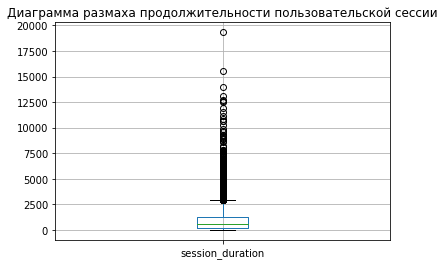

In [46]:
session_time.boxplot(column='session_duration') 
plt.title('Диаграмма размаха продолжительности пользовательской сессии')
plt.show()

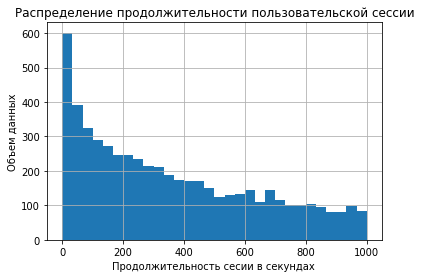

In [47]:
session_time['session_duration'].hist(bins=30,range=(0,1000))
plt.xlabel('Продолжительность сесии в секундах ')
plt.ylabel('Объем данных')
plt.title('Распределение продолжительности пользовательской сессии')
plt.show()

In [48]:
print('Средняя продолжительность пользовательской сессии: {:.2f} cекунд'.format(session_time['session_duration'].mean()))
print('Медианная продолжительность пользовательской сессии: {:.2f} секунд'.format(session_time['session_duration'].median()))

Средняя продолжительность пользовательской сессии: 974.23 cекунд
Медианная продолжительность пользовательской сессии: 559.00 секунд


На диаграмме размаха заметен выброс с продолжительностью сессии около 5,5 часов, сильно выбивающийся из общей выборки, а также еще несколько сессий, с продолжительностью в несколько часов.

Можно предположить, что данные пользователи могут быть перекупщиками, покупающими вещи в приложении "ненужные вещи" и продающими на иных платформах или местах,следовательно, для них характерно долгое пребывание в приложении в поиске новых вещей.Данные пользователи, возможно, в дальнейшем выделятся в отдельный сегмент, следовательно на данном этапе отсортировывать аномальные значения не следует.

<a id="step_3.6"></a> 
### Создание пользовательских профилей

Объединим датафрейм с данными о продолжительности пользовательских сессий с датафреймом с данными о количестве совершенных событий пользователем за одну сессию. Таким образом, мы получим полные данные и удалим события, имеющие нулевую продолжительность.

In [49]:
users_profile = pd.merge(session_time,events_number,how='left',on=['session_id','user_id'])
users_profile

,session_id,session_duration,user_id,event_count
0,0,596.0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,9
1,9,507.0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4
2,13,900.0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,14
3,27,758.0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,8
4,35,1521.0,00157779-810c-4498-9e05-a1e9e3cedf93,9
...,...,...,...,...
8218,74159,22.0,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2
8219,74162,974.0,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2
8220,74164,297.0,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,4
8221,74168,949.0,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,15


Cоздадим пользовательские профили, расчитаем для каждого пользователя медианное количество совершаемых им действий за одну сессию и медианную длительность сессии.

In [50]:
users_profile = (
    users_profile.groupby('user_id')
    .agg({'event_count':'median','session_duration':'median'})
    .reset_index()
)
users_profile.columns = ['user_id','median_events_count','median_session_duration']
users_profile

,user_id,median_events_count,median_session_duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,8.5,677.0
1,00157779-810c-4498-9e05-a1e9e3cedf93,14.0,2168.0
2,00463033-5717-4bf1-91b4-09183923b9df,10.0,1482.0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,4.5,957.0
4,00551e79-152e-4441-9cf7-565d7eb04090,3.5,279.5
...,...,...,...
4201,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,8.5,1482.5
4202,ffc01466-fdb1-4460-ae94-e800f52eb136,7.0,53.0
4203,ffcf50d9-293c-4254-8243-4890b030b238,2.0,80.0
4204,ffe68f10-e48e-470e-be9b-eeb93128ff1a,3.0,756.0


Таким образом, мы собрали важную информацию о пользовательской аквтивности в приложении:

* медианное количество совершаемых действий за одну сессию
* медианная длительность сессии

Данные метрики достаточно подробно характеризуют поведение пользователя в приложении, на основе них будет проведена сегментация.

<a id="step_4"></a> 
## Сегментация пользователей на основе действий

<a id="step_4.1"></a> 
### Кластеризация пользователей на основании алгоритма K-Means по данным из пользовательских профилей

При использовании методов кластеризации необходима стандартизация данных. Стандартизируем данные пользовательских профилей.

In [51]:
scaler = StandardScaler() 
X_sc = scaler.fit_transform(users_profile.drop(columns = ['user_id']))

Построение дендрограммы

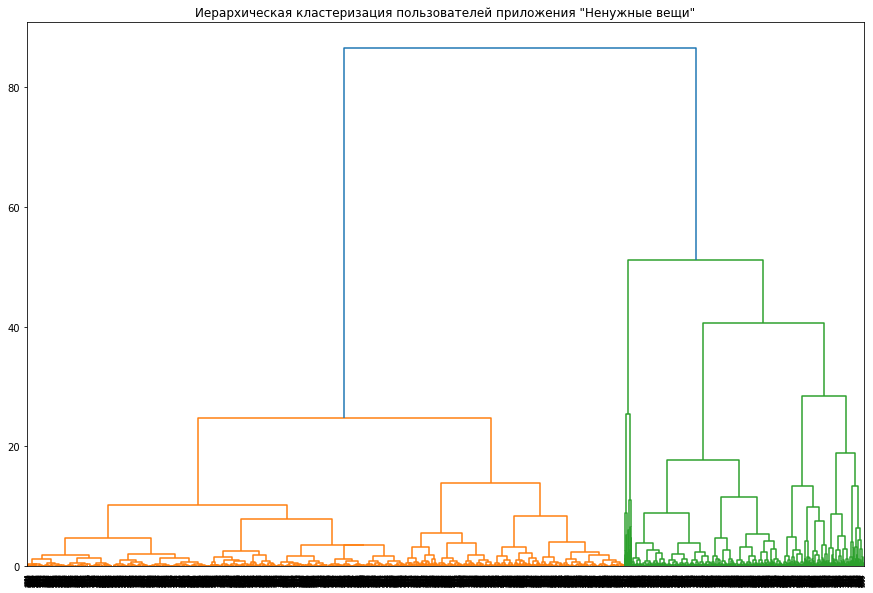

In [446]:
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация пользователей приложения "Ненужные вещи"')
plt.show() 

Хоть график иерархической кластеризации пользователей выделил только 2 различных цвета кластеров, в левой части заметны два больших ответвления. Вследствии чего, можно предположить, что следует выделить три кластера пользователей.

In [52]:
# задаём модель k_means с числом кластеров 3
km = KMeans(n_clusters=3, random_state=0)

# прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле датасета
users_profile['cluster_km'] = labels

users_profile

,user_id,median_events_count,median_session_duration,cluster_km
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,8.5,677.0,1
1,00157779-810c-4498-9e05-a1e9e3cedf93,14.0,2168.0,0
2,00463033-5717-4bf1-91b4-09183923b9df,10.0,1482.0,0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,4.5,957.0,1
4,00551e79-152e-4441-9cf7-565d7eb04090,3.5,279.5,1
...,...,...,...,...
4201,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,8.5,1482.5,0
4202,ffc01466-fdb1-4460-ae94-e800f52eb136,7.0,53.0,1
4203,ffcf50d9-293c-4254-8243-4890b030b238,2.0,80.0,1
4204,ffe68f10-e48e-470e-be9b-eeb93128ff1a,3.0,756.0,1


<a id="step_4.2"></a> 
### Построение графиков распределения признаков для кластеров и характеристика для каждого кластера

Выведем статистику по средним значениям признаков по кластеру

In [53]:
users_profile.groupby('cluster_km').mean()

,median_events_count,median_session_duration
cluster_km,,
0,13.814010,1773.207246
1,5.419018,474.359442
2,38.996835,3938.208861


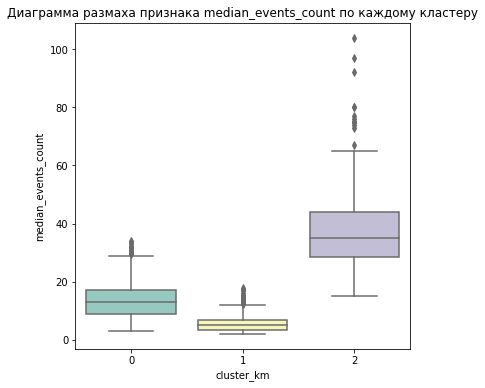

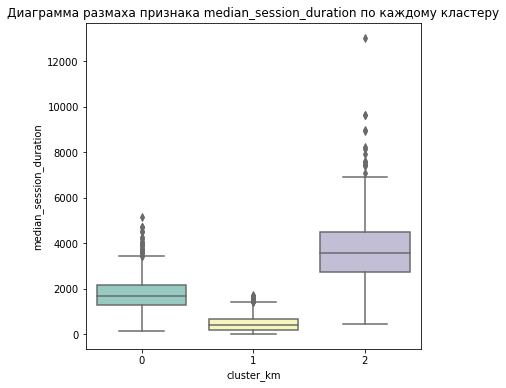

In [54]:
for column in users_profile[['median_events_count','median_session_duration']]:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x='cluster_km', y=users_profile[column], data=users_profile, palette='Set3')
    plt.title(f'Диаграмма размаха признака {column} по каждому кластеру')
    plt.show()

In [55]:
users_profile.query('cluster_km == 0')[['median_events_count','median_session_duration']].describe()

,median_events_count,median_session_duration
count,1035.000000,1035.000000
mean,13.814010,1773.207246
std,6.064287,714.477390
min,3.000000,132.000000
25%,9.000000,1285.500000
50%,13.000000,1665.000000
75%,17.000000,2138.500000
max,34.000000,5170.000000


In [56]:
users_profile.query('cluster_km == 1')[['median_events_count','median_session_duration']].describe()

,median_events_count,median_session_duration
count,3013.000000,3013.000000
mean,5.419018,474.359442
std,2.646237,341.791867
min,2.000000,1.000000
25%,3.500000,194.000000
50%,5.000000,407.000000
75%,7.000000,685.000000
max,18.000000,1712.000000


In [57]:
users_profile.query('cluster_km == 2')[['median_events_count','median_session_duration']].describe()

,median_events_count,median_session_duration
count,158.000000,158.000000
mean,38.996835,3938.208861
std,16.206323,1865.280208
min,15.000000,438.000000
25%,28.500000,2717.750000
50%,35.000000,3547.500000
75%,43.875000,4472.000000
max,104.000000,13050.000000


Мы сегментировали пользователей исходя из их пользовательской активности в приложении.

Кластер под номером 0: Средне активные пользователи. Распределение нормальных значений медианного количества событий за одну пользовательскую сессию находится в диапазоне от 9 до 17, с мединов в 13 событий, медиана продолжительности сессии для кластера около 30 минут (1665 секунд).

Кластер под номером 1: Мало активные пользователи. Распределение нормальных значений медианного количества событий за одну пользовательскую сессию находится в диапазоне  от 3 до 7 событий за одну пользовательскую сессию, медиана 5 событий. Медианная продолжительность пользовательской сессии для кластера около 7 минут (407 секунд)

Кластер под номером 2: Высоко активные пользователи. Совершают много действий и проводят длительное время в приложении. Распределение нормальных значений медианного количества событий за одну пользовательскую сессию находится в диапазоне от 29 до 44, медина 35 событий, однако на диаграмме размаха видны выбросы, максимальный из которых в 104 события за одну пользовательскую сесиию. Медианна продолжительности пользовательской сессии для кластера час (3547 секунд), однако и для данной метрики на диаграмме размаха существуют выбросы, максимальный из которых длиной в 3.5 часа, находящийся в отдалении от прочих выбросов.

<a id="step_5"></a> 
## Расчет и сравнение метрик пользователей из различных кластеров

<a id="step_5.1"></a> 
### Расчет и сравнение retention rate

Присоединяем к датасету с исходными данными информацию с указанием кластера пользователя.

In [58]:
df_result = pd.merge(users_profile[['user_id','cluster_km']],df_mobile,how='left',on='user_id')
df_result.head()

,user_id,cluster_km,event_time,event_name,event_date,source,diff,session_id,event_duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45,tips_show,2019-10-07,other,NaT,0,0 days 00:00:46
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:40:31,tips_show,2019-10-07,other,0 days 00:00:46,0,0 days 00:00:34
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:41:05,tips_show,2019-10-07,other,0 days 00:00:34,0,0 days 00:02:15
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:43:20,tips_show,2019-10-07,other,0 days 00:02:15,0,0 days 00:02:10
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:45:30,tips_show,2019-10-07,other,0 days 00:02:10,0,0 days 00:00:13


Задаем функцию для создания пользовательских профилей.

In [59]:
def get_profiles(sessions):

    profiles = (
        df_result.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .rename(columns={'event_time': 'first_ts'})
        .reset_index()  
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

In [60]:
profiles = get_profiles(df_result)
profiles.head()

,user_id,first_ts,dt,month
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,2019-10-07,2019-10-01
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33,2019-10-19,2019-10-01
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,2019-11-01,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05,2019-10-18,2019-10-01
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,2019-10-25,2019-10-01


В качестве момента анализа выбирем дату за пределом анализируемого периода.

In [61]:
profiles['dt'].max()

datetime.date(2019, 11, 3)

Задаем функцию для расчета retention rate.

In [62]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],  # параметр для группировки таблицы удержания
    ignore_horizon=False,
):

    
    dimensions = dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions, on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=dimensions,
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

In [63]:
# расчёт удержания с разбивкой по совершению покупок и устройствам
retention_raw, retention = get_retention(
    profiles, df_result, datetime(2019, 11,3).date(), 7, dimensions=['cluster_km']
)
# исключаем размеры когорт и удержание первого дня
report = retention.drop(columns=['cohort_size', 0])

report

,1,2,3,4,5,6
cluster_km,,,,,,
0,0.081851,0.060498,0.043891,0.039146,0.033215,0.036773
1,0.123897,0.107057,0.087811,0.074579,0.074178,0.072173
2,0.059701,0.052239,0.022388,0.029851,0.029851,0.022388


Построим хитмэп удержания с разбивкой по кластерам.

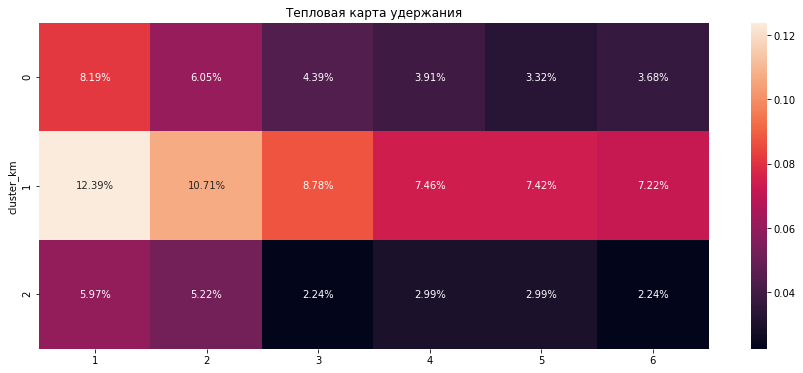

In [64]:
plt.figure(figsize = (15, 6))  
sns.heatmap(report, annot = True,  fmt = '.2%')
plt.title('Тепловая карта удержания')  
plt.show()

<Figure size 720x432 with 0 Axes>

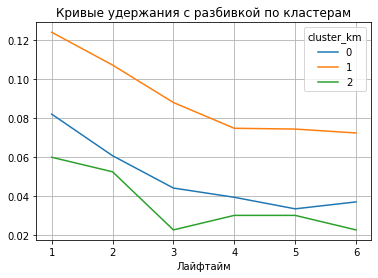

In [65]:
plt.figure(figsize=(10, 6))
report.T.plot(
        grid=True,
        xticks=list(report.columns.values)
    )
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по кластерам')
plt.show()

Пользователи из кластера под номером 1 удерживаются лучше прочих. По светлым пятнам на графике видно, что у данных пользователей лучшее удержание на протяжении всех дней лайфтайма. Удержание на седьмой день составляет 7,22%.

Пользователи из кластера 2 имеют наихудшее удержание. По графику изменений хорошо видно, что удержание четвертого дня резко упало, однако на 5 день началось восстановление. Удержание четвертого и шестого дня одинаково и составляет 2,24%.

Пользователи из кластера 0 удерживаются лучше,чем из кластера 2. На 2,3,4 день удержание стаблильно резко снижается, однако на 5,6 темпы снижения уменьшаются, удержание седьмого дня лучше, чем удержание шестого - 3,68% и 3,32% соответственно

В целом приложение показывает низкие результаты удержания пользователей. Однако, низкие значения удержания не всегда несут негативный характер, возможно, пользователи приложения быстро находят то, что искали в "Ненужных вещах". Однозначно определить в норме ли на данный момент удержание пользователей и стоил ли стремиться увеличивать или уменьшать данный показатель, можно будет сказать после анализа всех метрик.

<a id="step_5.2"></a> 
### Расчет и сравнение времени, проведенного пользователем в приложении

In [66]:
time_in_app = pd.merge(users_profile[['user_id','cluster_km']],session_time,how='left',on='user_id')
time_in_app

,user_id,cluster_km,session_id,session_duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0,596.0
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,9,507.0
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,13,900.0
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,27,758.0
4,00157779-810c-4498-9e05-a1e9e3cedf93,0,35,1521.0
...,...,...,...,...
8218,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,1,74159,22.0
8219,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,1,74162,974.0
8220,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,1,74164,297.0
8221,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,1,74168,949.0


In [67]:
time_in_app = time_in_app.groupby(['user_id','cluster_km']).agg({'session_duration':'sum'}).reset_index()
time_in_app = time_in_app.rename(columns={'session_duration':'time_in_app'})
time_in_app.head()

,user_id,cluster_km,time_in_app
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2761.0
1,00157779-810c-4498-9e05-a1e9e3cedf93,0,11774.0
2,00463033-5717-4bf1-91b4-09183923b9df,0,1482.0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,1,6644.0
4,00551e79-152e-4441-9cf7-565d7eb04090,1,559.0


Выведем среднее время ,проведенное пользователем в приложении, по каждому кластеру.

In [68]:
time_in_app.groupby('cluster_km')['time_in_app'].mean().round()

cluster_km
0    3211.0
1    1268.0
2    5481.0
Name: time_in_app, dtype: float64

Сравним медианное время, проведенное в приложении, для пользователей из разных кластеров

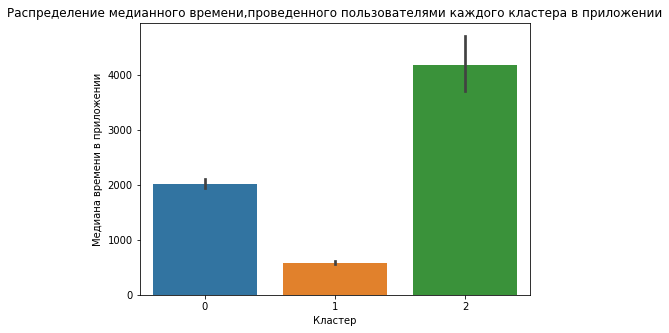

cluster_km
0    2010.0
1     587.0
2    4186.0
Name: time_in_app, dtype: float64

In [69]:
from numpy import median
plt.figure(figsize=(7,5))
ax = sns.barplot(y=time_in_app.time_in_app,x=time_in_app.cluster_km,estimator=median)
plt.title('Распределение медианного времени,проведенного пользователями каждого кластера в приложении')
plt.xlabel('Кластер')
plt.ylabel('Медиана времени в приложении')
plt.show()
time_in_app.groupby('cluster_km')['time_in_app'].median().round()

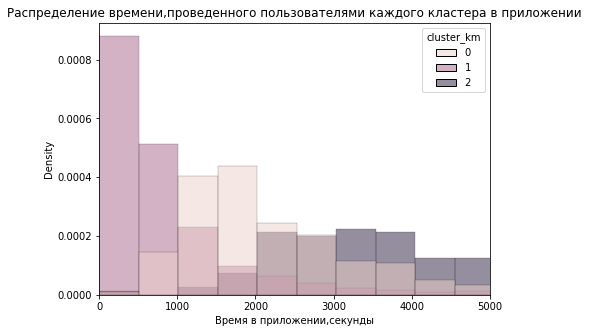

In [70]:
plt.figure(figsize=(7,5))
sns.histplot(data=time_in_app, x='time_in_app', hue='cluster_km', bins=200, stat='density', common_norm=False);
plt.xlim(0,5000)
plt.xlabel('Время в приложении,секунды')
plt.title("Распределение времени,проведенного пользователями каждого кластера в приложении");

Пользователи приложения из кластера №2 проводят значительно большее время в приложении, чем пользователи из других кластеров, медианное время пользования приложением составляет больше часа (4186 секунд).

Медианное время в приложении для пользователей первого кластера около 10 минут. Пользователи данного кластера проводят в приложении наименьшее количество времени.

Медианное время в приложении для пользователей нулевого кластера около 33,5 минут. 

<a id="step_5.3"></a> 
### Расчет и сравнение среднего количества действий пользователей разных кластеров

In [71]:
cluster_mean_event = (
    df_result.groupby(['user_id','cluster_km'])
    .agg({'event_name':'count'})
    .reset_index()
    .rename(columns={'event_name':'event_amount'})
)
cluster_mean_event.groupby('cluster_km')['event_amount'].mean().round()

cluster_km
0    25.0
1    13.0
2    54.0
Name: event_amount, dtype: float64

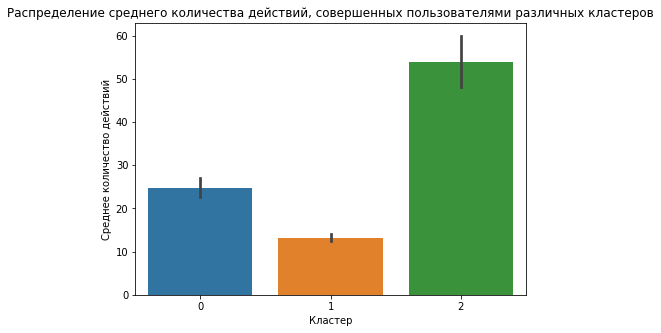

In [72]:
plt.figure(figsize=(7,5))
ax = sns.barplot(y=cluster_mean_event.event_amount,x=cluster_mean_event.cluster_km)
plt.title('Распределение среднего количества действий, совершенных пользователями различных кластеров')
plt.xlabel('Кластер')
plt.ylabel('Среднее количество действий')
plt.show()

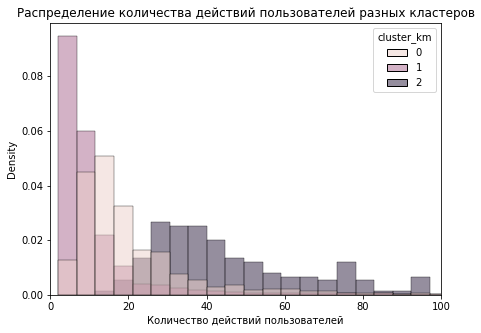

In [73]:
plt.figure(figsize=(7,5))
sns.histplot(data=cluster_mean_event, x='event_amount', hue='cluster_km', bins=100, stat='density', common_norm=False);
plt.xlim(0,100)
plt.xlabel('Количество действий пользователей')
plt.title("Распределение количества действий пользователей разных кластеров");

In [ ]:
# построим график распределения суммарных продаж по годам
cluster_mean_event.pivot_table(index='year_of_release',columns='platform',values='all_sales',aggfunc='sum').plot(figsize=(12,6))
plt.ylabel('all_sales')
plt.xlim(1999,2016)
plt.show()

Пользователи из второго кластера совершают наибольшее количество действий в приложении, среднее количество действий для пользователей данного кластера составляет 54, согласно графику распределения наибольшая плотность пользователей с количеством действий в диапазоне от 25 до 40.

Пользователи из первого кластера совершают наименьшее количество действий в приложении, среднее количество действий для пользователей данного кластера составляет 13, согласно графику распределения наибольшая плотность пользователей с количеством действий в диапазоне от 1 до 5.

Пользователю нулевого кластера совершают в среднем 25 действий в приложении, согласно графику распределения наибольшая плотность пользователей с количеством действий в диапазоне от 10 до 15.

<a id="step_3.7"></a> 
### Расчет конверсии в целевое действие — просмотр контактов

In [74]:
df_result.head()

,user_id,cluster_km,event_time,event_name,event_date,source,diff,session_id,event_duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45,tips_show,2019-10-07,other,NaT,0,0 days 00:00:46
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:40:31,tips_show,2019-10-07,other,0 days 00:00:46,0,0 days 00:00:34
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:41:05,tips_show,2019-10-07,other,0 days 00:00:34,0,0 days 00:02:15
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:43:20,tips_show,2019-10-07,other,0 days 00:02:15,0,0 days 00:02:10
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:45:30,tips_show,2019-10-07,other,0 days 00:02:10,0,0 days 00:00:13


In [75]:
df_contacts_show = df_result.query('event_name == "contacts_show"')[['user_id','cluster_km','event_time']] 
df_contacts_show = df_contacts_show.reset_index(drop=True)
df_contacts_show

,user_id,cluster_km,event_time
0,00157779-810c-4498-9e05-a1e9e3cedf93,0,2019-10-20 19:17:18
1,00157779-810c-4498-9e05-a1e9e3cedf93,0,2019-10-20 19:23:11
2,00157779-810c-4498-9e05-a1e9e3cedf93,0,2019-10-20 19:30:31
3,00157779-810c-4498-9e05-a1e9e3cedf93,0,2019-10-20 20:04:53
4,00157779-810c-4498-9e05-a1e9e3cedf93,0,2019-10-29 21:26:40
...,...,...,...
4509,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,1,2019-11-03 14:38:51
4510,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,1,2019-11-03 14:41:24
4511,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,1,2019-11-03 14:42:26
4512,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,1,2019-11-03 15:48:05


In [76]:
profiles = pd.merge(df_result[['user_id','cluster_km']],profiles,how='right',on='user_id')
profiles = profiles.drop_duplicates().reset_index(drop=True)
profiles

,user_id,cluster_km,first_ts,dt,month
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45,2019-10-07,2019-10-01
1,00157779-810c-4498-9e05-a1e9e3cedf93,0,2019-10-19 21:34:33,2019-10-19,2019-10-01
2,00463033-5717-4bf1-91b4-09183923b9df,0,2019-11-01 13:54:35,2019-11-01,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,1,2019-10-18 22:14:05,2019-10-18,2019-10-01
4,00551e79-152e-4441-9cf7-565d7eb04090,1,2019-10-25 16:44:41,2019-10-25,2019-10-01
...,...,...,...,...,...
4201,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,0,2019-10-13 16:11:27,2019-10-13,2019-10-01
4202,ffc01466-fdb1-4460-ae94-e800f52eb136,1,2019-10-07 20:32:49,2019-10-07,2019-10-01
4203,ffcf50d9-293c-4254-8243-4890b030b238,1,2019-10-23 11:51:35,2019-10-23,2019-10-01
4204,ffe68f10-e48e-470e-be9b-eeb93128ff1a,1,2019-10-21 16:39:33,2019-10-21,2019-10-01


In [77]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    contacts_show,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первого просмотра контактов для каждого пользователя
    first_contacts_show = (
        df_contacts_show.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .reset_index()
    )
    

    # добавляем данные о целевом действии в профили
    result_raw = result_raw.merge(
        first_contacts_show[['user_id', 'event_time']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм 
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

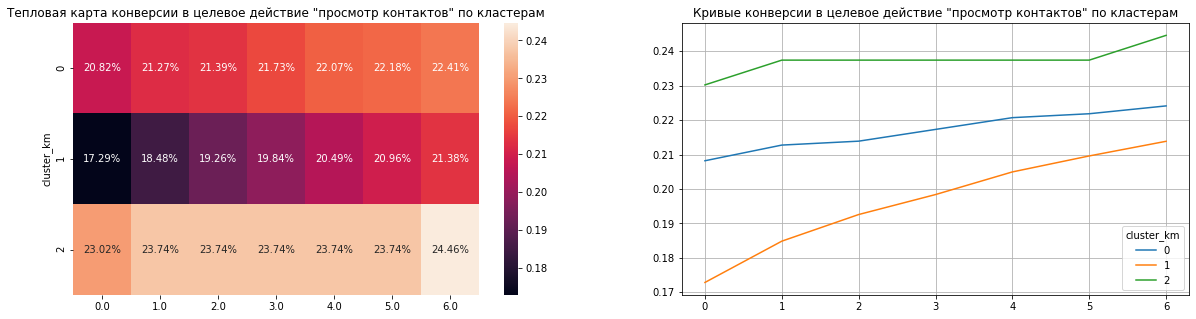

In [78]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, df_contacts_show, datetime(2019, 11,4).date(), 7, dimensions=['cluster_km']
)

plt.figure(figsize = (20, 5)) 

report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%',ax=plt.subplot(1, 2, 1)
)  
plt.title('Тепловая карта конверсии в целевое действие "просмотр контактов" по кластерам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  
plt.title('Кривые конверсии в целевое действие "просмотр контактов" по кластерам')

plt.show()

По графику можно сделать следующие выводы:

Выше всего конверсия у посетителей из второго кластера: более 23% пользователей просматривают контакты в день первого посещения, а к седьмому дню  доля просмотревших контакты - 24,46%. 

Хуже всего конвертируются в целевое действие пользователи из первого кластера: конверсия первого дня - 17,29%. К седьмому дню конверсия данных пользователей отстаёт от конверсии пользователей второго кластера на 3,08% и на 1,03% от конверсии пользователей нулевого кластера.

Как видно из графика кривых конверсии, в целом конверсия пользователей из всех кластеров постепенно растёт на протяжении всех семи дней.

<a id="step_5"></a> 
## Проверка статистических гипотез

Выделим группы пользователей необходимые для проверки гипотез.

Разделим пользователей на группы по источнику установки приложения и рассчитаем количество пользователей, совершивших целевое действие в каждой из групп.

In [79]:
source_yandex = df_result.query('source == "yandex"')
source_google = df_result.query('source == "google"')

In [80]:
yandex_users = source_yandex['user_id'].nunique()
yandex_users_cs = source_yandex.query('event_name == "contacts_show"')['user_id'].nunique()

google_users = source_google['user_id'].nunique()
google_users_cs = source_google.query('event_name == "contacts_show"')['user_id'].nunique()

In [81]:
source_users = pd.DataFrame({
    'source': ['yandex','google'],
    'all_users' : [yandex_users,google_users],
    'contacts_show' : [yandex_users_cs,google_users_cs]
})
source_users['conversion'] = round(source_users['contacts_show'] / source_users['all_users'] * 100,2)
source_users.set_index(['source'],inplace=True)
source_users = source_users.T
source_users

source,yandex,google
all_users,1896.00,1114.00
contacts_show,475.00,273.00
conversion,25.05,24.51


Разделим пользователей на группы по характеристике просмотр рекомендаций в приложении и рассчитаем количество пользователей, совершивших целевое действие в каждой из групп.

Выделим пользователей, которые хоть раз просматривали рекомендации в приложении.

In [82]:
df_result['tips_show'] = ""
for i in range(len(df_result['event_name'])):
    if df_result['event_name'][i] == 'tips_show':
        df_result['tips_show'][i] = 1
    else:
        df_result['tips_show'][i] = 0
df_result.head()

,user_id,cluster_km,event_time,event_name,event_date,source,diff,session_id,event_duration,tips_show
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45,tips_show,2019-10-07,other,NaT,0,0 days 00:00:46,1
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:40:31,tips_show,2019-10-07,other,0 days 00:00:46,0,0 days 00:00:34,1
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:41:05,tips_show,2019-10-07,other,0 days 00:00:34,0,0 days 00:02:15,1
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:43:20,tips_show,2019-10-07,other,0 days 00:02:15,0,0 days 00:02:10,1
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:45:30,tips_show,2019-10-07,other,0 days 00:02:10,0,0 days 00:00:13,1


In [83]:
with_tips_show = df_result.query('tips_show == 1')
users_with_tips_show_list = list(with_tips_show['user_id'].unique())
with_tips_show = df_result.query('user_id in @users_with_tips_show_list') 
without_tips_show = df_result.query('user_id not in @users_with_tips_show_list') 

In [84]:
users_with_tips_show = with_tips_show['user_id'].nunique()
users_with_tips_show_cs = with_tips_show.query('event_name == "contacts_show"')['user_id'].nunique()

users_without_tips_show = without_tips_show['user_id'].nunique()
users_without_tips_show_cs = without_tips_show.query('event_name == "contacts_show"')['user_id'].nunique()

In [85]:
tips_show_users = pd.DataFrame({
    'tips_show': ['with_tips_show','without_tips_show'],
    'all_users' : [users_with_tips_show,users_without_tips_show],
    'contacts_show' : [users_with_tips_show_cs,users_without_tips_show_cs]
})
tips_show_users['conversion'] = round(tips_show_users['contacts_show'] / tips_show_users['all_users'] * 100,2)
tips_show_users.set_index(['tips_show'],inplace=True)
tips_show_users = tips_show_users.T
tips_show_users

tips_show,with_tips_show,without_tips_show
all_users,2760.0,1446.00
contacts_show,516.0,456.00
conversion,18.7,31.54


<a id="step_5.1"></a> 
### Гипотеза №1 : Конверсии в просмотры контактов для пользователей, установивших приложение по ссылке из yandex, и пользователей, установивших приложение по ссылке из google, различаются.

Нулевая гипотеза: Между конверсиями в просмотры контактов для пользователей, установивших приложение по ссылке из yandex, и пользователей, установивших приложение по ссылке из google,  нет статистически значимой разницы.

Альтернативная гипотеза: Между конверсиями в просмотры контактов для пользователей, установивших приложение по ссылке из yandex, и пользователей, установивших приложение по ссылке из google, существует статистически значимая разница, конверсии данных групп различны.

Критический уровень статистической значимости: 0.05

Задаем функцию для z_test

In [481]:
def z_test (df,gr1,gr2, target_event, alpha):

    successes_1 = df.loc[target_event, gr1]
    successes_2 = df.loc[target_event, gr2]
    trials_1 = df.loc['all_users', gr1]
    trials_2 = df.loc['all_users', gr2]
 
    
    p1 = successes_1/trials_1
 
   
    p2 = successes_2/trials_2
 
    
    p_combined = (successes_1 + successes_2) / (trials_1 + trials_2)
 
    
    difference = p1 - p2 
 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials_1 + 1/trials_2))
 
    
    distr = st.norm(0, 1)
 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
 
    print('событие {} p-значение: {:.3f}'.format(target_event, p_value))
 
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [482]:
z_test(source_users, 'yandex','google','contacts_show', alpha=0.05)

событие contacts_show p-значение: 0.738
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Нет оснований полагать, что ресурс, через который пользователи перешли в приложение имеет влияние на конверсию в просмотр контактов.

<a id="step_5.2"></a> 
### Гипотеза №2 : Конверсии в просмотры контактов для пользователей, просмотревших рекомендованные объявления, и пользователей, не просмотревших рекомендованные объявления, различаются.

Нулевая гипотеза: Между конверсиями в просмотры контактов для пользователей, просмотревших рекомендованные объявления, и пользователей, не просмотревших рекомендованные объявления,  нет статистически значимой разницы.

Альтернативная гипотеза: Между конверсиями в просмотры контактов для пользователей, просмотревших рекомендованные объявления, и пользователей, не просмотревших рекомендованные объявления, существует статистически значимая разница, конверсии данных групп различны.

Критический уровень статистической значимости: 0.05

In [483]:
z_test(tips_show_users, 'with_tips_show','without_tips_show','contacts_show', alpha=0.05)

событие contacts_show p-значение: 0.000
Отвергаем нулевую гипотезу: между долями есть значимая разница


Мы можем получить нулевое значение p_value, когда две пропорции не равны.

Однако мы также можем сравнить рассчитанный `conversion` для двух групп, конверсия в просмотр контактов выше для группы не просмотревших рекомендованные объявления. Можно предположить, что такие значения конверсии получились в результате неэффективной работы алгоритма по подбору рекомендаций в приложении.

<a id="step_7"></a> 
## Общие выводы и рекомендации.

Мы провели исследовательский анализ данных, в ходе которого удалость установить:

* Абсолютное большинство пользователей совершает всего одну пользовательскую сессию в приложении;
* Среднее количество сессий на одного пользователя: 2;
* Среднее количество событий за одну пользовательскую сессию: 7;
* Средняя продолжительность пользовательской сессии: 974.23 cекунд (~16 минут);
* Медианная продолжительность пользовательской сессии: 559.00 секунд (~9 минут).

Сегментация пользователей приложения была проведена на основе их пользовательской активности, а именно характеристик:
* медианное количество совершаемых действий за одну сессию
* медианная длительность сессии

Сегментация пользователей была проведена путем кластеризации, в результате кластеризации пользователи приложения были разделены на 3 кластера:

Кластер под номером 0: средне активные пользователи

Кластер под номером 1: мало активные пользователи

Кластер под номером 2: высоко активные пользователи.

Для каждого кластера были рассчитаны, а далее сравнены следующие метрики:
* время, проведенное пользователем в приложении;
* среднее количество действий, совершенных пользователем;
* retention rate;
* конверсия в целевое действие — просмотр контактов.

В ходе анализа метрик было выявлено:
1. Низкие значения удержания для пользователей всех кластеров.

2. Низкое значение удержания для кластера №2. Данные пользователи проявляют активность в приложении, но удерживаются плохо.

3. Короткое время пребывания в приложении для пользователей первого кластера. При этом пользователи данного кластера удерживаются заметно лучше, чем пользователи нулевого и второго кластера, однако значение конверсии в целевое действие - просмотр контактов ниже, чем для прочих кластеров. Можно предположить, что у пользователей данного кластера есть потребности в приложении, они удерживаются, находясь в поиске подходящей вещи, но не всегда доходят до результата.

4. Конверсия пользователей в просмотр контактов из второго кластера выше, чем для прочих, однако стоит заметить, что данные пользователи проводят в приложении гораздо большее время, относительно прочих.

Также было проведено сравнение конверсий в целевое действие - просмотр контактов для пользователей двух групп:
* просмотревших рекомендованные объявления
* не просмотревших рекомендованные объявления

В ходе чего было выявлено, что конверсия не просмотревших выше, чем конверсия просмотревших рекомендованные объявления.

На основе проведенного анализа и выявленных проблем, следует предложить следующие рекомендации по улучшению приложения:

Для повышения конверсии в целевое действие, следует рассмотреть возможность модернизации поисковых алгоритмов, на данном этапе обнаружены проблемы пользователей с быстрым нахождением необходимого им запроса.

Также стоит рассмотреть возможность улучшения алгоритмов для подбора рекомендованных объявлений, конверсия в целевое действие для просмотревших рекомендации ниже, чем для не просмотревших рекомендации пользователей, что свидетельствует об неэффективности данного метода. 

К тому же, можно отправить запрос в маркетинговый отдел для рассмотрения вопроса о привлечения новых пользователей в приложение, с акцентом на тех, кто объявление размещает, с целью повышения предложения товаров в приложении.

<a id="step_8"></a> 
## Презентация.

Ссылка на презентацию: https://drive.google.com/file/d/1fdKjGZgzpUtu9iSBkgzabiTrorAfRvRY/view?usp=sharing